## AUTHOR GUIDELINES FOR AI COMPSCI 4004 2021/2022 [REPLACE WITH YOUR OWN TITLE]

*Heting Ying - 2647735Y*

University of Glasgow


## Abstract

> Governments across the world had to take some restrictive measures in the face of COVID-19 pandemic. In this coursework, you are in charge of defining an optimal strategy in the introducing and relaxing of restrictive measures in a simulated COVID-19 scenario.  This strategy, also called a policy, will be learned by an artificial agent through Reinforcement Learning, which is the main subject covered in this course. 
>
> This notebook acts both as a report template, an introduction to the ViRL environment you will use, and a description of the assessed exercises for this coursework. As a reminder, deadline for submission is 3rd December 2021 at 16:30 via Moodle. 
>
> **Please remove this text section and write a short and concise abstract for your report**

## Introductory video

> Long, detailed and unedited video for those that prefer learning about the coursework that way
>
> **Please remove this section and video from your report**

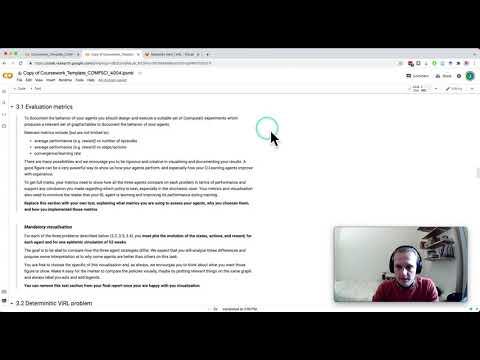

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('DjAqZBhmqH8')

## Report style and word limit

> At the end of this coursework, you will submit a single IPython Notebook based on the template we provide here. The entirety of your work should fit within this notebook, this includes:
*   the code you will develop and use to produce results and figures. It should be self-contained.
*   the reporting of your work, including an introduction, methods, results and various discussions.
>
> You are **limited to 5000 words and 10 figures** in the main part of your report. This only includes words that are in "Text" cells and does not include references and appendices. You can write as much code as you want, although it is good practice to trim your code down to what is really needed. 
>
> The function we will use to compute the number of words in the notebook is shown below. Run the cell below to check the number of words in this document. 
>
> **Please remove this text section for your final report, but keep the code section below so we can count words.**

In [ ]:
# Obtain the notebook JSON as a string
from google.colab import _message

notebook_json = _message.blocking_request('get_ipynb', request='', timeout_sec=5)

# collate all text in Markdown cells
all_text = ''
for cell in notebook_json['ipynb']['cells']:
    if cell['cell_type'] == "markdown":
        all_text += ' '.join(cell['source'])
# replace # and \n by empty space
all_text = all_text.replace('#', '').replace('\n', '')
# find main section and reference & appendix section
before_eof, eof, after_eof = all_text.partition('===EOF===')  # please do not temper with this

# count words per section, our counting method is simple and probably plays in your favor
report_word_count = len(before_eof.split())
remaining_word_count = len(after_eof.split())

print("Your report currently has {} words".format(report_word_count))
print("Your reference and appendix currently have {} words".format(remaining_word_count))

# Please respect this convention and work with it, not against it.
# We will run an independant word count check on all notebooks submitted

Your report currently has 2898 words
Your reference and appendix currently have 420 words


# Code style and completeness

> All code should be included in your notebook submission in the relevant sections of the document. For example, code for your agent should be in the method section, and code to train, compute and plot results should be in the results section. The marking scheme allocates marks for sensible content, we expect you to comment your code where required and to use explicit variable names so we can follow your code easily.
>
> **Please remove this text section for your final report so it is not counted toward the word limit.**

# 1. Introduction

> Your mission is to design, implement, evaluate and document a number of virtual agents which can learn (optimal) COVID-19 mitigation policies.
>
> **We suggest you split your introduction into three parts as follow**

## 1.1 Motivation

> Introduce the context and the problem you are trying to solve in your own words. We gave you some context in the abstract which you will need to rephrase this in your own words.
>
> **Replace this section with your own text**


## 1.2 Task Environment

> **Replace this section with your own text to introduce the environment in your own words**
>
> The environment under consideration is called ViRL and is an Epidemics Reinforcement Learning Environment for exploring the effect of different mitigation policies on the spread of the COVID-19 virus.
>
> ViRL is available at https://git.dcs.gla.ac.uk/SebastianStein/virl, check the Readme for more information.
>
> External libraries, like ViRL, can be installed directly from inside the notebook as follow:

In [1]:
!git clone https: // git.dcs.gla.ac.uk / SebastianStein / virl.git

Cloning into 'virl'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Receiving objects: 100% (55/55), 1.80 MiB | 5.19 MiB/s, done.
Resolving deltas: 100% (17/17), done.


> Once cloned from GitLab, you can add the virl folder to the path where Python can look for libraries (sys.path)

In [2]:
## to import virl, we add the virl folder cloned above to the path where Python can look for libraries (sys.path)
import sys

sys.path.append('virl')
import virl

> The ViRL library can now be used directly from this notebook
>
> You can import most data-science or ML librairies directly as needed

In [3]:
from matplotlib import pyplot as plt
import numpy as np

> In ViRL, agents are tasked with controlling the spread of a virus with one of four non-medical policy interventions: 
0. no intervention (remove all restrictions)
1. impose a full lockdown
2. implement track & trace
3. enforce social distancing and face masks
>
> Once per week, the agent obtains evidence of the state of the epidemic as the number of persons that are 
0. susceptibles
1. infectious
2. quarantined
3. recovereds
>
> Based on these information, the agent can decide what action to take. Each episode ends after 52 weeks, irrespective of the remaining number of infected individuals at that time.
> 
> Each intervention has a different impact on the infection rate, on the total number of simultaneously infected and hospitalized persons, and on the economic opportunity cost, which are summarized as a single scalar reward at each time step. 
> 
> This relationship between the state of the epidemic and the reward is coded into the simulator and make use of some default parameters that you should not try to change. At the end of every week, you are given a rewards value for the week as a negative float number, the lower the rewards the worst the outcome. 
> 
> Below is an example of running an dummy agent on the ViRL environment. This agent will always take the same action every week, irrespectively of the current state of the population.

In [12]:
env = virl.Epidemic()

states = []
rewards = []
done = False
s = env.reset()  # reset the environment before using it and log the starting state
states.append(s)
while not done:
    s, r, done, i = env.step(action=0)  # deterministic agent doing action 0 (no-intervention)
    states.append(s)
    rewards.append(r)

> As a example, you can now plot the evolution of states and reward for the 52 weeks of this epidemic simulation.

Total reward for this episode is  -1.9231823993453754


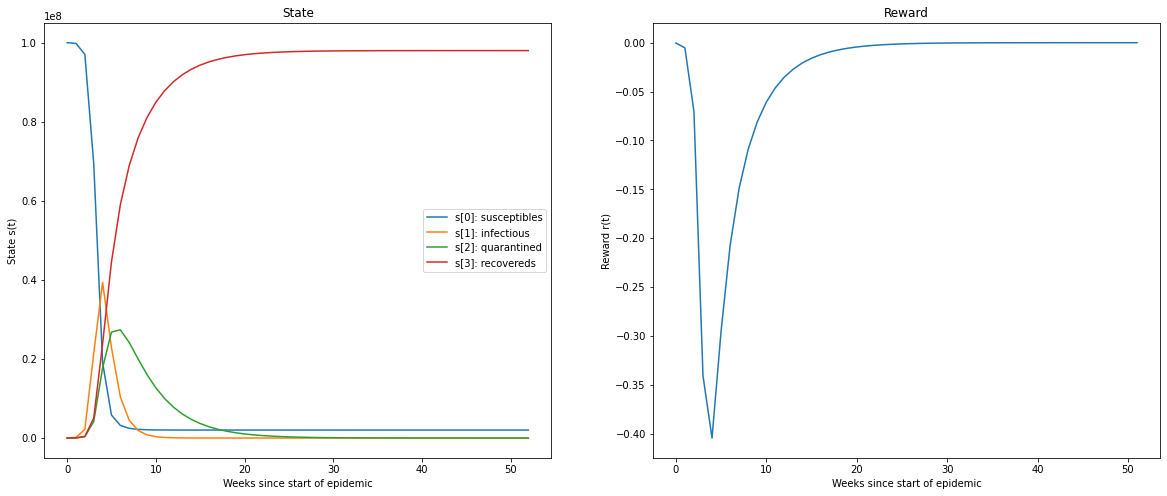

In [13]:
# start a figure with 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
states = np.array(states)

# plot state evolution on the left subplot
for i in range(4):
    axes[0].plot(states[:, i], label=labels[i])
axes[0].set_title('State')
axes[0].set_xlabel('Weeks since start of epidemic')
axes[0].set_ylabel('State s(t)')
axes[0].legend()

# plot reward evolution on the right subplot
axes[1].plot(rewards)
axes[1].set_title('Reward')
axes[1].set_xlabel('Weeks since start of epidemic')
axes[1].set_ylabel('Reward r(t)')

print('Total reward for this episode is ', np.sum(rewards))

> You can see that this policy creates a rapid surge in the number of people getting Covid-19 (notice the y-axis scale) at the beginning of this epidemics. As a result the reward is dipping low into the negative during the first few weeks of the epidemics.
> 
> **Rewrite this section in your own way using information also provided on the GitLab repositoy**


## 1.3 PEAS Anlysis

> **Do a PEAS analysis here for your report**

# 2. Method and Implementation

> We ask you to implement three types of agents (Random, Deterministic, Q-Learning with Neural Network Function Approximation) and describe in this section how you implemented them.
>
> **Replace this section with your own text**


## 2.1 Random Agent

> Implement and explain a random agent that every week takes an action at random. 
>
> We encourage you to show your implementation in this section by adding the code for your agent as a "Code" section below.
>
>**Replace this section with your own text and add code below**

In [ ]:
import numpy as np

# get virl env
env = virl.Epidemic()

states = []
rewards = []
done = False

# reset the env
s = env.reset()
# add initial state into states
states.append(s)
while not done:
    # set random action (0~3)
    random_action = np.random.random() * 4
    s, r, done, i = env.step(action=random_action)
    states.append(s)
    rewards.append(r)

## 2.2 Deterministic Agent

> Implement and explain a deterministic agent that every week take an action based on the information available to it. This is a hardcoded agent that you build by hand, trying to be the best you can do on the ViRL simulator.
> 
> We encourage you to show your implementation in this section by adding the code for your agent as a "Code" section below.
>
>**Replace this section with your own text and add code below**

In [ ]:
# add code for your deterministic agent

## 2.3 Q-Learning with Function Approximation

> Implement and explain a reinforcement learning agent that every week takes an action based on its experience from playing against the simulator for hundreds of training episodes.
> 
> You will need to implement and explain how an agent can learn using Q-Learning with Function Approximation as seen during the Lectures. You can use either neural network or RBF functions for the function approximation.
>
> Later in your report, you will have to train this agent and report how it learns and how it performs on the ViRL simulator.
> 
> We encourage you to show your implementation in this section by adding the code for your agent as a "Code" section below.
>
>**Replace this section with your own text and add code below**

In [ ]:
# add code for your Q-Learning with Neural Network Function Approximation agent

# 3. Results

>In this section, you want to test and report the performance of your agents on three different versions of the ViRL environments.
>
>Before describing the three environments, we expect that you reflect and explain how you decided to assess and compare the performance of agents and different policies. 
>
>**Replace this section with your own text**

## 3.1 Evaluation metrics

>To document the behavior of your agents you should design and execute a suitable set of (computer) experiments which produces a relevant set of graphs/tables to document the behavior of your agents.
>
>Relevant metrics include (but are not limited to): 
*   average performance (e.g. reward) vs number of episodes
*   average performance (e.g. reward) vs steps/actions
*   convergence/learning rate
>
>There are many possibilities and we encourage you to be rigorous and creative in visualising and documenting your results. A good figure can be a very powerful way to show us how your agents perform, and especially how your Q-Learning agents improve with experience.
>
>To get full marks, your metrics need to show how all the three agents compare on each problem in terms of performance and support any conclusion you made regarding which policy is best, especially in the stochastic case.  Your metrics and visualisation also need to convince the reader that your RL agent is learning and improving its performance during training.
>
>**Replace this section with your own text, explaining what metrics you are using to assess your agents, why you choosen them, and how you implemented those metrics**

>#### ***Mandatory visualisation***
>
>For each of the three problems described below (3.2, 3.3, 3.4), you **must plot the evolution of the states, actions, and reward; for each agent and for one epidemic simulation of 52 weeks**. 
>
>The goal is to be abel to compare how the three agent strategies differ. We expect that you will analyse these differences and propose some interpretation at to why some agents are better than others on this task.
>
>You are free to choose the specific of this visualisation and, as always, we encourgae you to think about what you want those figure to show. Make it easy for the marker to compare the policies visually, maybe by plotting relevant things on the same graph, and always label you axis and add legends.
>
>**You can remove this text section from your final report once your are happy with you visualisation**

## 3.2 Determinitic ViRL problem

>In this section, you will evaluate all agents on a deterministic version of the ViRL environment.
>
>The Epidemic environment implements 10 deterministic epidemic problems, each with a different set of parameters. The specific problem simulated by an instance of Epidemic is specified in the constructor's `problem_id` parameter
>
>For example, to instanciate the problem 0, you can do `env = virl.Epidemic(problem_id=0)`
>
>Below is a code that plots the epidemic evolution when a dummy agent that always takes the same action is in charge.

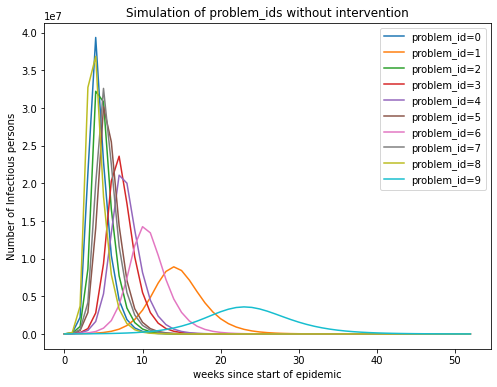

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# for all problem ID in [0:9]
for i in range(10):
    env = virl.Epidemic(problem_id=i)
    states = []
    rewards = []
    done = False

    s = env.reset()
    states.append(s)
    while not done:
        s, r, done, info = env.step(action=0)  # dummy agent - no-intervention always
        states.append(s)
        rewards.append(r)

    # plot number of infectious persons each week from problem i  
    ax.plot(np.array(states)[:, 1], label=f'problem_id={i}')

ax.set_xlabel('weeks since start of epidemic')
ax.set_ylabel('Number of Infectious persons')
ax.set_title('Simulation of problem_ids without intervention')
ax.legend()

> #### **Pick a problem ID**
>
>For the training and evaluation of your agents, we ask you to pick and work with one project ID only. You can pick any project ID, we do not evaluate absolute performance from your agents but the methodology and analysis you will carry out so the project ID is just to offer some variations between students.

> **Write code to train your Q-Learning with Function Approximation agent and test all 3 agents on the deterministic problem ID you selected**



## 3.3 Determinitic ViRL problem with observational noise

> In this section, you will evaluate all agents on the same determinitis problem ViRL environment but with noisy observation. This is to simulate an imperfect measurement of the various population metrics that constitute the state of this system. Please reuse the same problem ID as in section 3.2 above.
>
>Independent observation noise on each timestep can be activated by setting the `noisy` flag in the constructor (`noisy=True`). The figure below illustrates one sequence of noisy observations, where no intervention (action=0) is performed.



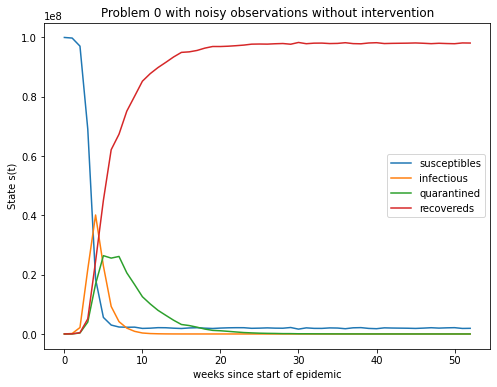

In [ ]:
# instanciante a virl env for problem ID 0 and with observational noise
env = virl.Epidemic(problem_id=0, noisy=True)

states = []
rewards = []
done = False

s = env.reset()
states.append(s)
while not done:
    s, r, done, info = env.step(action=0)  # dummy agent
    states.append(s)
    rewards.append(r)

# plot the state evolution
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['susceptibles', 'infectious', 'quarantined', 'recovereds']
states = np.array(states)
for i in range(4):
    ax.plot(states[:, i], label=labels[i]);
ax.set_xlabel('weeks since start of epidemic')
ax.set_ylabel('State s(t)')
ax.set_title('Problem 0 with noisy observations without intervention')
ax.legend()

>You can notice some additional noise is added to the observed state of the population. The noise will change each time you run the cell above.
>
>In this section you want to study and discuss the effect that this noise is having on each agent. As the noise is added randomly and will differ between each run, we suggest to:
1.   Set a random seed before starting your simulation, training and evaluation, so the results are reproducible. This is important for people reading your work, typically markers, that might want to run your code to verify the results or plot the figure again. You can refer the function below as an helper for setting a random seed.
>
>```python
def set_seed(seed, verbose=True):
    if verbose:
        print('Setting seed to {}'.format(seed))
    random.seed(seed)
    np.random.seed(seed)
```
>
>2.   Evaluate performance on multiple run of the simulation and show some metrics of the distribution of results. E.g. mean and standard-deviation, or more advanced representation.


## 3.4 Stochastic ViRL problem with observational noise

> In this section, you will evaluate all agents on a stochastic version of the ViRL environment with noisy observation.
> 
> A stochastic environment with different epidemic dynamics in each episode can be activated by setting the `stochastic` flag to `True` in the constructor. Each time, a new epidemic similation is generated with unique internal parameter values for population dynamics, viral infection, etc. This is intended to reflect the unknown elements when a new virus emerges.
>
> The code cell below illustrates how the number of infected persons varies across random draws if no intervention (action=0) is performed. This simulation also has the noisy flag to True. If `stochastic=True`, then problem_id is ignored. 

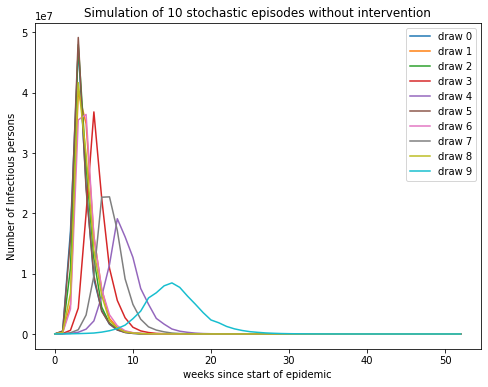

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# we run 10 simulation, each time the virl environment has different 
# parameters due to the stochastic=True flag
for i in range(10):
    env = virl.Epidemic(stochastic=True, noisy=True)
    states = []
    rewards = []
    done = False
    s = env.reset()
    states.append(s)
    while not done:
        s, r, done, info = env.step(action=0)  # dummy agent
        states.append(s)
        rewards.append(r)
    # plot the state evolution
    ax.plot(np.array(states)[:, 1], label=f'draw {i}')

ax.set_xlabel('weeks since start of epidemic')
ax.set_ylabel('Number of Infectious persons')
ax.set_title('Simulation of 10 stochastic episodes without intervention')
ax.legend()

> As shown in the figure above, each of the 10 run of this simulation resulted in different epidemic dynamics. How do your agents perform on such a variable environment set? 
>
> In this section we ask you to study and discuss the effect that stochasticity and noise is having on each agent. As in section 3.3, it is recommended to present results as distribution and to set a random seed to enable reproductibility of your results.
>
> **Write code to train your Q-Learning with Function Apporximation agent and test all 3 agents on the stochastic problem with observational noise**

## 3.5 Improving generalization performance

> For full marks, we ask you to find and test one possible change in your Q-Learning with Function Approximation agent that might improve the generalization performance of this agent in the (`stochastic=True, noisy=True`) scenario.
> 
> Try to come up with a solution by yourself. Otherwise, a good source of ideas might be found in *Rainbow: Combining improvements in deep reinforcement learning by Hessel, M., et al, in Thirty-second AAAI conference on artificial intelligence, 2018*; available at  https://arxiv.org/abs/1710.02298.
> 
> Why do you think your proposed solution will work? How did you implement it? Did it lead to the expected results? Why?
>
> *Please keep in mind that this task is to test your ability to take a bird eye view on what you learned in class and experiment with an idea. **It is not an absolute test of how good you can get an agent to generalise on this task.** As such, focus on picking and discussing one solution, implement it, test it, and reflect on the result. Then, unless you are genuinely curious, stop, do not spend countless hours trying many different solutions expecting a better mark. Your time might be better invested in other sections of this report, in other courses, or in sleep that will help you make more connection between neurons in your brain.*
>
>**Write code to update your Q-Learning with Function Approximation agent so it might generalize better on the stochastic problem with observational noise.**

# 4. Real-world reflection

***Could the optimal policies you developed in this work be used to inform decision making by politicians?***

> You must discuss the above question explicitly in this section.
>
> You might want to reflect on variables of the problem that we did not explore, or assumptions that were done in the development of this simulation. We want here to see that you can think about the real-world consequences and ethical consideration raised when working with machine learning and simulated models.
>
> Another way to look at this question is to ask yourself: "If you were part of the scientific advisory board of the Scottish government, how would you report your findings from such a study?"
>
> **[Replace this prompt with your own reflexion. Keep the question at the top of this question for context]**

# 5. Discussion

> Usual discussion style section. What did you learn? What are the limitations of your approach? What would you do differently?
>
> Show us that you have thought about this problem. You are not evaluated on the raw performance of your agent but on your abilities to think on your own two feet on this project. It is sometimes wiser to invest some time to reflect on your work here than to spent countless hours trying to optimize your code to get slightly better performance. 
>
>**Replace this prompt with your own reflexion.**


# ===EOF===

> This is a flag to tell the word counter to stop counting, anything in and below this cell will not be counted towards your report word count.
>
> Please do change this cell, any word below EOF does not count toward your report word count. Also please do not try to be snicky about the word counter; embrace the constraints we give you rather than fight them.

# References

> You can add unlimited references. Try to use a consistent format across the document for references, the specific citation style is up to you as long as we can retrieve easily the document you link here if needed.

# Appendices

> You can add as much supplementray information below. It will not be counted towards the word limit but you should not expect the marker to read this section for marking.

# Exporting your report

> To simplify your life, we made an automatic script below to create your submission file.
>
> If you provide your student number and the sharing url for you colab notebook below, the last cell will do the following:
1. Generate a folder to save your report
2. Export this notebook as a .ipynb file
3. Convert and save this notebook as a static html page
4. Convert and save this notebook as a standalone pdf file
5. Create a html file that automatically redirect to your notebook sharing url
6. Create a .zip file with all these files
7. Downloading the .zip file to your default download folder
>
>You just have to check the result is good for you and submit the .zip file on Moodle before the deadline. Couldn't be any easier right?





> **Please make sure your word count is around 5000 and you have not more than 10 figures before submtting your report. You are expected to remove all instruction text given in this template (above the EOF section) from your final report so it is not counted toward your final world count.**

## Add information about you and your Colab notebook sharing URL

>First add your student number in the `YOUR_STUDENT_NUMBER` variable below.
>
>Then generate a sharing URL for this notebook. See https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm and choose "Anyone with the link option".
>
>Finally, add your Colab sharing URL in the `SHARING_URL_FOR_THIS_COLAB` variable below.

In [ ]:
YOUR_STUDENT_NUMBER = "REPLACE_WITH_YOUR_STUDENT_NUMBER"

# get a sharable link and copy it below
# See https://www.tutorialspoint.com/google_colab/google_colab_sharing_notebook.htm
# and choose "Anyone with the link option"
SHARING_URL_FOR_THIS_COLAB = "REPLACE_WITH_YOUR_SHARING_URL_FOR_THIS_COLAB"

> **If you are confused at this stage, watch the step-by-step video below**

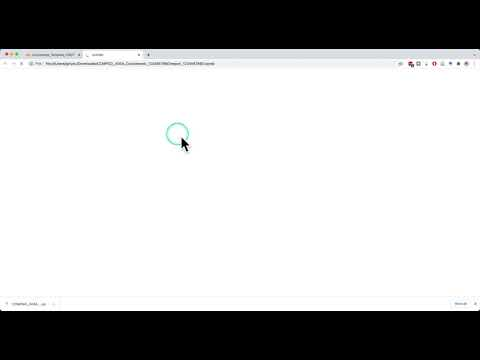

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('JlcJ8FeEvvI', width=1120, height=630)

## Generate and export your files

> Well done! Now run the cell below and it will generate all the files you need for your submission

In [ ]:
# Exporting your submission files

###########################################
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Please do not change this code cell in any way
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
###########################################

# checking you did read the above cell and added your information
# again please be smart and add your information above rather than modifying the code below
STUDENT_CHANGED_DEFAULT_VALUES = True

# checking you entered a student number
if YOUR_STUDENT_NUMBER == "REPLACE_WITH_YOUR_STUDENT_NUMBER":
    STUDENT_CHANGED_DEFAULT_VALUES = False
    print("###########################################")
    print("")
    print("Please add your student number in the YOUR_STUDENT_NUMBER variable in the code cell above!")
    print("")
    print("###########################################")

# checking you entered a URL that works
if SHARING_URL_FOR_THIS_COLAB == "REPLACE_WITH_YOUR_SHARING_URL_FOR_THIS_COLAB":
    STUDENT_CHANGED_DEFAULT_VALUES = False
    print("###########################################")
    print("")
    print(
        "Please add your Colab sharing URL number in the `SHARING_URL_FOR_THIS_COLAB` variable in the code cell above!")
    print("")
    print("###########################################")

if not STUDENT_CHANGED_DEFAULT_VALUES:
    raise ValueError(
        'You have not added you student number and/or shared the sharing URL for your Colab notebook. \n Please read the above cells carefully.')

# define some folder and file names
import os

report_foldername = "COMPSCI_4004_Coursework_{}".format(YOUR_STUDENT_NUMBER)
report_folderpath = os.path.join("/content", report_foldername)
ipynb_filename = os.path.join(report_folderpath, "report_{}.ipynb".format(YOUR_STUDENT_NUMBER))
html_redirect_filename = os.path.join(report_folderpath, "colab_link_{}.html".format(YOUR_STUDENT_NUMBER))
report_zip_filename = os.path.join(report_folderpath, "{}.zip".format(report_foldername))

# create folder if it does not exist
if not os.path.exists(report_folderpath):
    print("Creating {} folder...".format(report_folderpath))
    os.mkdir(report_folderpath)

# Obtain the notebook JSON as a string
print("Saving notebook as {}...".format(ipynb_filename))

from google.colab import _message

notebook_json = _message.blocking_request('get_ipynb', request='', timeout_sec=5)

# save ipynb part into a file locally
import json

with open(ipynb_filename, 'w') as f:
    f.write(json.dumps(notebook_json["ipynb"]))

# export to html
print("Exporting notebook as html file...")
os.system("jupyter nbconvert --to html {}".format(ipynb_filename))

#export to pdf
print("Exporting notebook as pdf file...")
## make sure xetex is installed
print("Installing required librarie, this might take a while, be patient...")
!apt-get -qq install texlive-xetex texlive-fonts-recommended texlive-generic-recommended > / dev / null
## export to pdf
os.system("jupyter nbconvert --to pdf {}".format(ipynb_filename))

# paste the url for this colab in a html file redirecting to it
print("Creating html redirecting file to your Colab...")

html_redirect_content = """
<!DOCTYPE HTML>
<html lang="en-US">
    <head>
        <meta charset="UTF-8">
        <meta http-equiv="refresh" content="0; url={colab_link}">
        <script type="text/javascript">
            window.location.href = "{colab_link}"
        </script>
        <title>Page Redirection</title>
    </head>
    <body>
        <!-- Note: don't tell people to `click` the link, just tell them that it is a link. -->
        If you are not redirected automatically, follow <a href='{colab_link}'>{colab_link}</a>.
    </body>
</html>
""".format(colab_link=SHARING_URL_FOR_THIS_COLAB)

with open(html_redirect_filename, 'w') as f:
    f.write(html_redirect_content)

# # zip the folder with all results
print("Making a zip file of the all thing...")
os.system("cd {}; zip -r {} *".format(report_folderpath, report_zip_filename))

# download the zip folder for submission
print("Downloading the zip file to your computer...")

from google.colab import files

files.download(report_zip_filename)

#
print("")
print("All done! Check and submit the downloaded zip file")

Creating /content/COMPSCI_4004_Coursework_123456789D folder...
Saving notebook as /content/COMPSCI_4004_Coursework_123456789D/report_123456789D.ipynb...
Exporting notebook as html file...
Exporting notebook as pdf file...
Installing required librarie, this might take a while, be patient...
Extracting templates from packages: 100%
Creating html redirecting file to your Colab...
Making a zip file of the all thing...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All done! Check and submit the downloaded zip file
